In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
dt = pd.read_csv('/content/future-gc00-daily-prices.csv')

In [ ]:
dt.head()
print(dt[['Open', 'High', 'Low', 'Close']].dtypes)



Open     object
High     object
Low      object
Close    object
dtype: object


In [ ]:
print(dt.shape)


(3703, 5)


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3703 non-null   object
 1   Open    3703 non-null   object
 2   High    3703 non-null   object
 3   Low     3703 non-null   object
 4   Close   3703 non-null   object
dtypes: object(5)
memory usage: 144.8+ KB


In [ ]:
for column in dt.columns:
    unique_values = dt[column].unique()
    print(f"Unique values in '{column}' column:", unique_values)

Unique values in 'Date' column: ['01/02/2013' '01/02/2014' '01/02/2015' ... '12/31/2019' '12/31/2020'
 '12/31/2021']
Unique values in 'Open' column: ['1,676.40' '1,204.50' '1,184.00' ... '1,060.60' '1,517.70' '1,899.00']
Unique values in 'High' column: ['1,695.40' '1,230.80' '1,194.90' ... '1,681.00' '1,904.90' '1,831.40']
Unique values in 'Low' column: ['1,670.90' '1,202.50' '1,167.30' ... '1,279.70' '1,517.50' '1,889.10']
Unique values in 'Close' column: ['1,688.80' '1,225.20' '1,186.20' ... '1,281.30' '1,523.10' '1,828.60']


In [ ]:
print(dt.describe())

              Date      Open      High       Low     Close
count         3703      3703      3703      3703      3703
unique        3703      2930      2976      2990      2975
top     01/02/2013  1,782.00  1,283.90  1,272.00  1,317.80
freq             1         6         6         6         6


# **Visualizations and Analysis:**

Line Plot of Gold Prices Over Time:

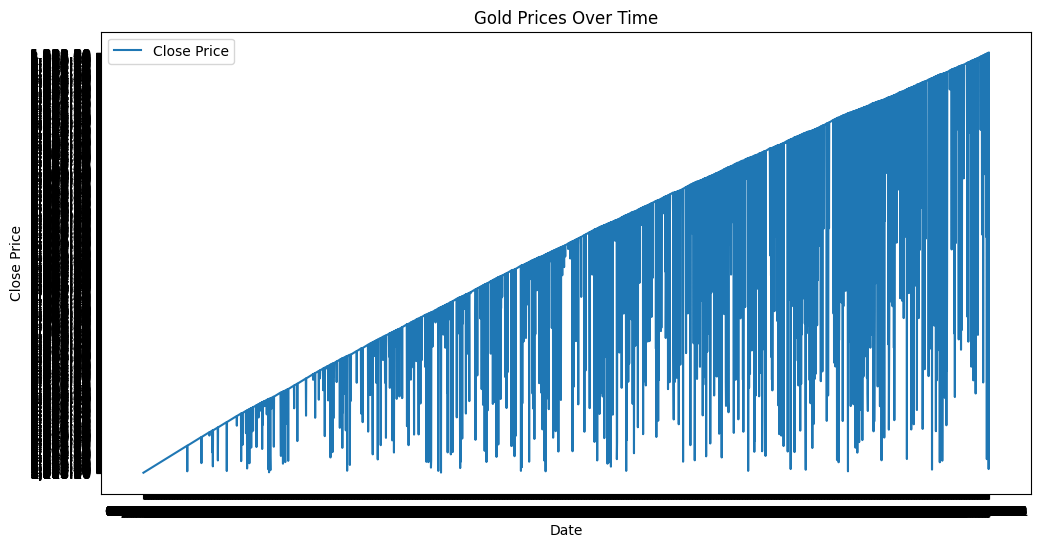

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(dt['Date'], dt['Close'], label='Close Price')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Gold Close Price with 30-Day Rolling Average:

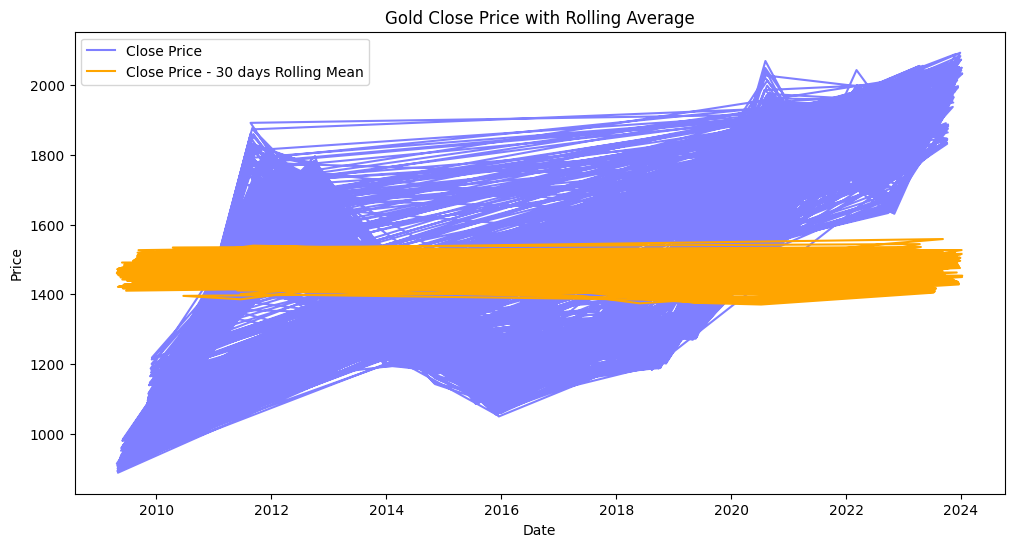

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


dt['Date'] = pd.to_datetime(dt['Date'])

numeric_columns = ['Open', 'High', 'Low', 'Close']
for column in numeric_columns:
    dt[column] = pd.to_numeric(dt[column].str.replace(',', ''), errors='coerce')

dt.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
for column in numeric_columns:
    dt[column + '_rolling_mean'] = dt[column].rolling(window=30).mean()

plt.plot(dt['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(dt['Close_rolling_mean'], label='Close Price - 30 days Rolling Mean', color='orange')
plt.title('Gold Close Price with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Boxplot of Gold Price Attributes:

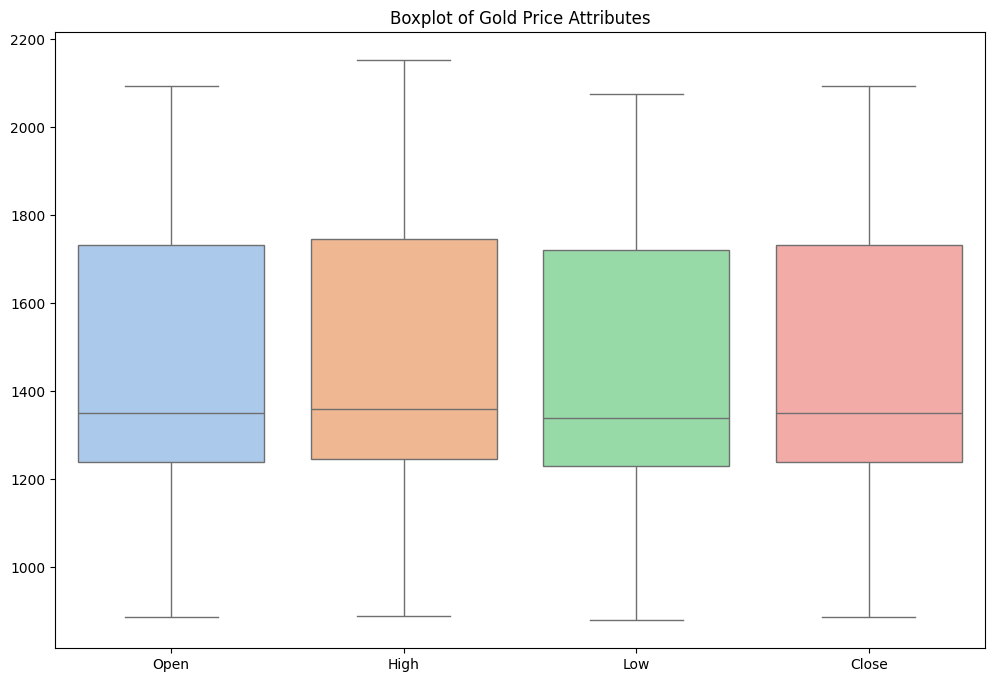

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dt[['Open', 'High', 'Low', 'Close']], palette='pastel')
plt.title('Boxplot of Gold Price Attributes')
plt.show()

Histograms of Gold Price Attributes:

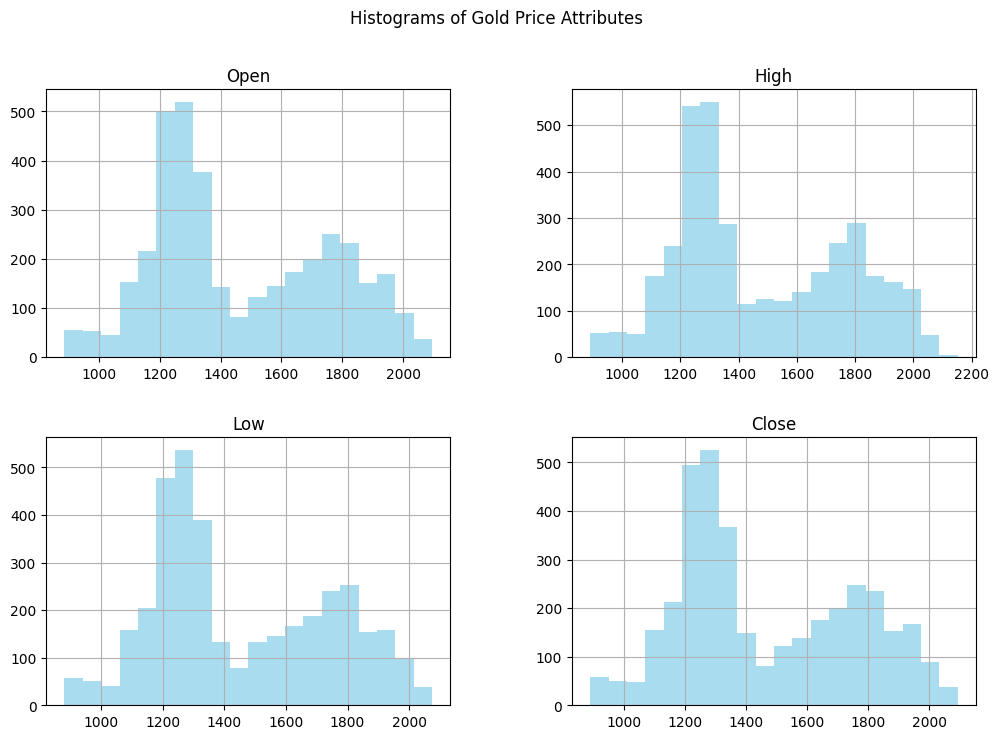

In [ ]:
dt[['Open', 'High', 'Low', 'Close']].hist(bins=20, figsize=(12, 8), color='skyblue', alpha=0.7)
plt.suptitle('Histograms of Gold Price Attributes')
plt.show()

Gold Price Candlestick Chart:

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=dt.index,
                open=dt['Open'],
                high=dt['High'],
                low=dt['Low'],
                close=dt['Close'])])

fig.update_layout(title='Gold Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)
fig.show()


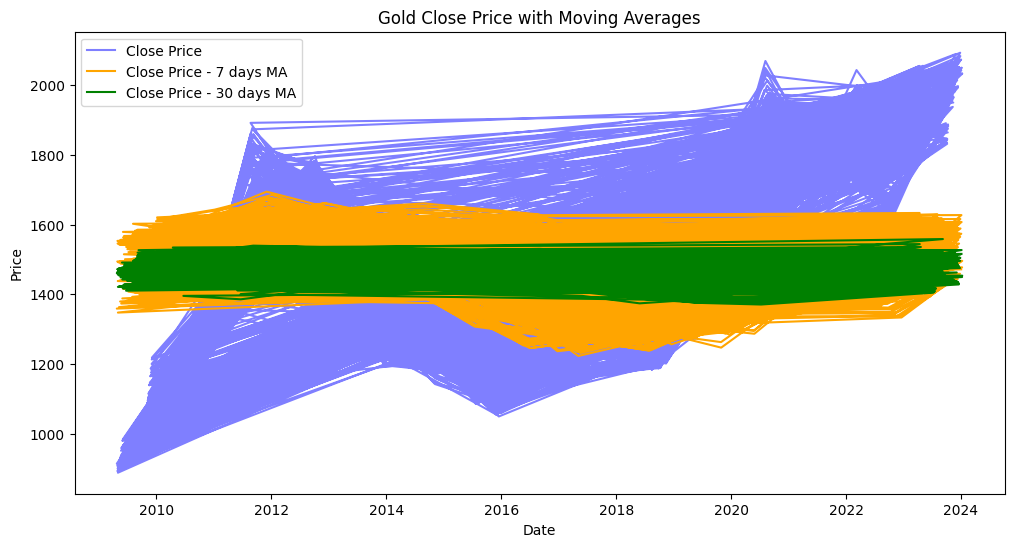

In [ ]:
plt.figure(figsize=(12, 6))
for window in [7, 30]:
    dt['Close_MA_' + str(window)] = dt['Close'].rolling(window=window).mean()

plt.plot(dt['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(dt['Close_MA_7'], label='Close Price - 7 days MA', color='orange')
plt.plot(dt['Close_MA_30'], label='Close Price - 30 days MA', color='green')
plt.title('Gold Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Autocorrelation Plot of Gold Close Price:

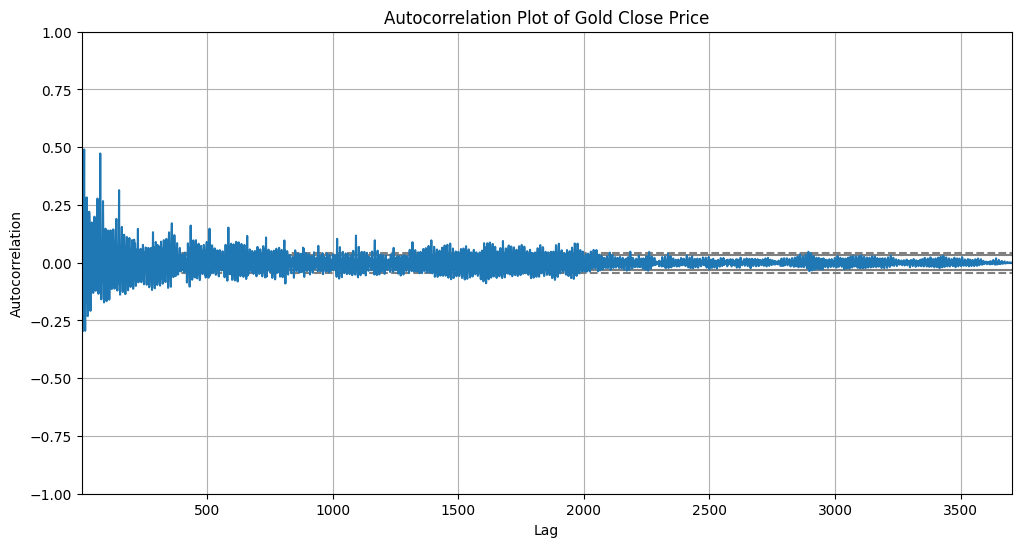

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 6))
autocorrelation_plot(dt['Close'])
plt.title('Autocorrelation Plot of Gold Close Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


# **Gold prices Prediction:**

Predicting gold prices involves utilizing machine learning models such as Linear Regression, Decision Trees, Random Forest, and SVM. Trained on historical data, these models aim to forecast future gold prices, enabling investors to make informed decisions based on accurate predictions. The choice of model depends on the dataset characteristics and desired predictive accuracy.

### 1)Linear Regression:

In [ ]:
features = dt[['Close']]
target = dt['Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - Mean Squared Error: {mse_linear}')
print(f'Linear Regression - R-squared Score: {r2_linear}')


Linear Regression - Mean Squared Error: 9.069962856941092e-28
Linear Regression - R-squared Score: 1.0


### 2. Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f'Decision Tree - Mean Squared Error: {mse_tree}')
print(f'Decision Tree - R-squared Score: {r2_tree}')


Decision Tree - Mean Squared Error: 0.12283400809716255
Decision Tree - R-squared Score: 0.9999985318694662


### 3. Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f'Random Forest - Mean Squared Error: {mse_forest}')
print(f'Random Forest - R-squared Score: {r2_forest}')


Random Forest - Mean Squared Error: 0.14806186504722527
Random Forest - R-squared Score: 0.9999982303423267


### 4. Support Vector Machine (SVM):

In [ ]:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'SVM - Mean Squared Error: {mse_svm}')
print(f'SVM - R-squared Score: {r2_svm}')


SVM - Mean Squared Error: 3111.8843773805643
SVM - R-squared Score: 0.9628062900257356


### 5. Gradient Boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train, y_train)

y_pred_boosting = boosting_model.predict(X_test)

mse_boosting = mean_squared_error(y_test, y_pred_boosting)
r2_boosting = r2_score(y_test, y_pred_boosting)

print(f'Gradient Boosting - Mean Squared Error: {mse_boosting}')
print(f'Gradient Boosting - R-squared Score: {r2_boosting}')


Gradient Boosting - Mean Squared Error: 4.811176427026736
Gradient Boosting - R-squared Score: 0.9999424960959467


## **Comparing Accuracy and  Mean Squared Error Through visualization**

Comparison of Algorithm Accuracy:

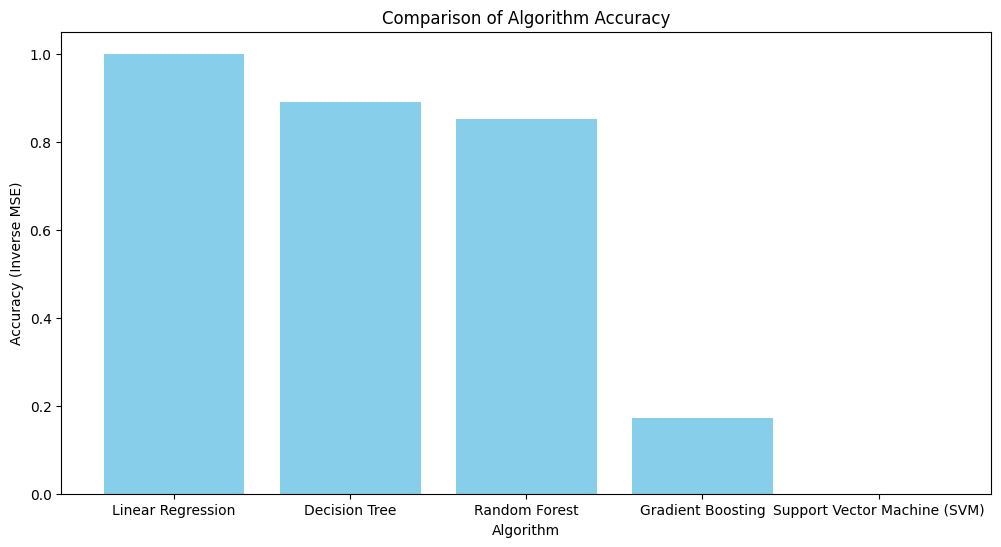

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine (SVM)': SVR()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

results_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Mean Squared Error'])

plt.figure(figsize=(12, 6))
plt.bar(results_df['Algorithm'], 1 / (1 + results_df['Mean Squared Error']), color='skyblue')  # Invert MSE for better visualization
plt.title('Comparison of Algorithm Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (Inverse MSE)')
plt.show()

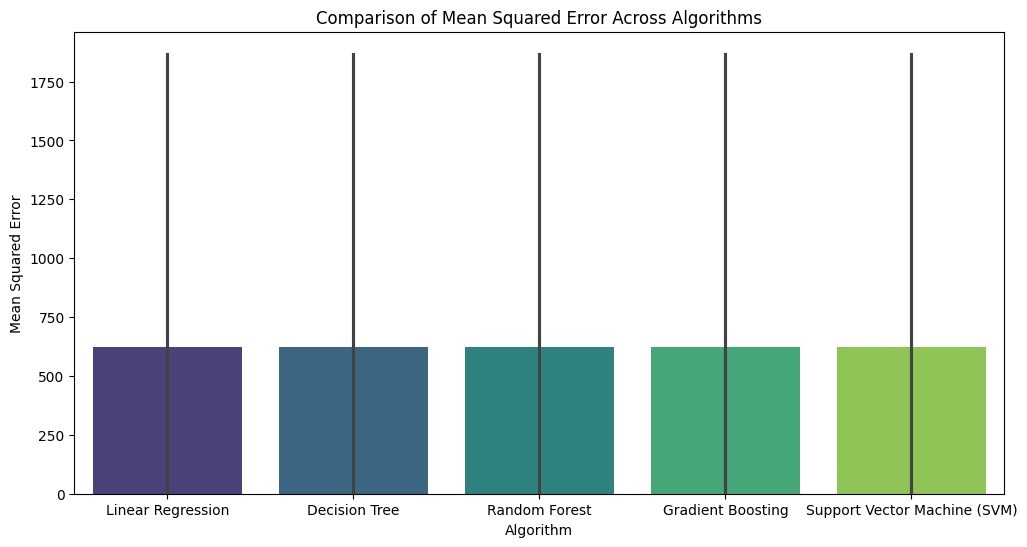

In [ ]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'Mean Squared Error': mse, 'R-squared Score': r2}

results_df = pd.DataFrame({model: [metric['Mean Squared Error'] for model, metric in results.items()] for model in models})

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, palette='viridis')
plt.title('Comparison of Mean Squared Error Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.show()

Box Plot of Mean Squared Error Across Algorithms:

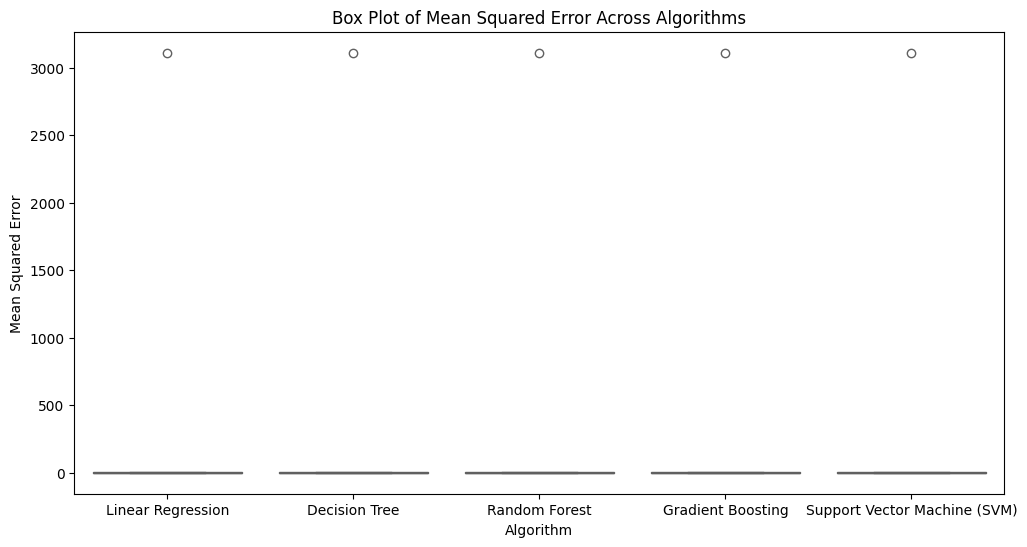

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df, palette='coolwarm')
plt.title('Box Plot of Mean Squared Error Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.show()

Violin Plot of Mean Squared Error Across Algorithms:

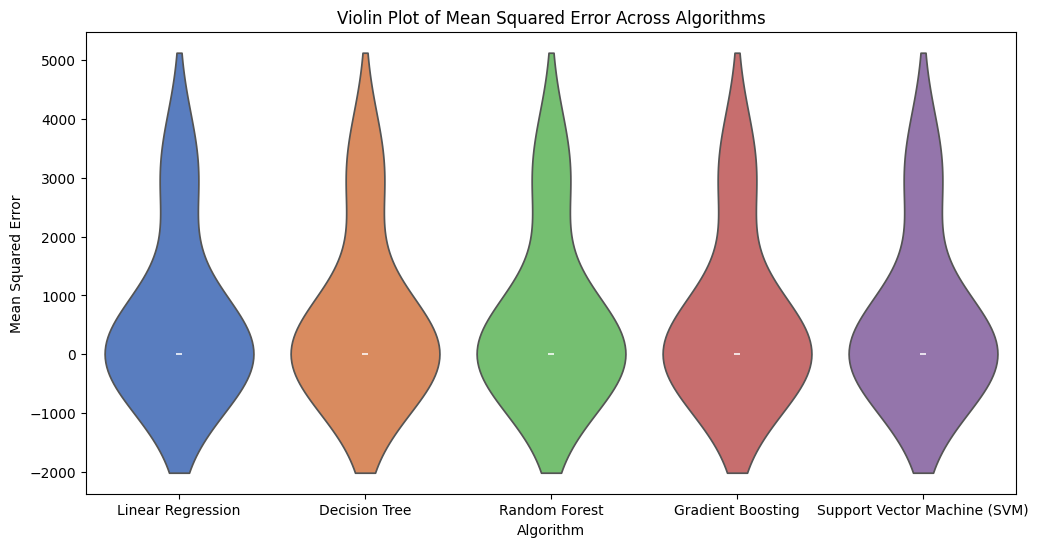

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=results_df, palette='muted')
plt.title('Violin Plot of Mean Squared Error Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.show()

Comparison of R-squared Scores Across Algorithms:

<ipython-input-46-0295ee3e3b22>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




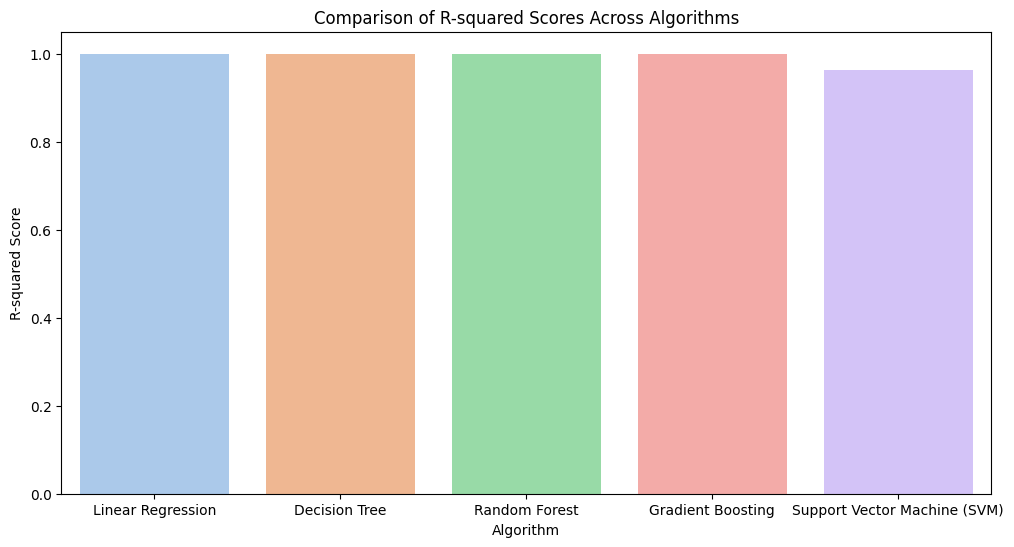

In [ ]:
r2_scores = {model_name: metric['R-squared Score'] for model_name, metric in results.items()}
r2_scores_df = pd.DataFrame(list(r2_scores.items()), columns=['Algorithm', 'R-squared Score'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='R-squared Score', data=r2_scores_df, palette='pastel')
plt.title('Comparison of R-squared Scores Across Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.show()



Scatter Plot of Predicted vs. Actual Values:

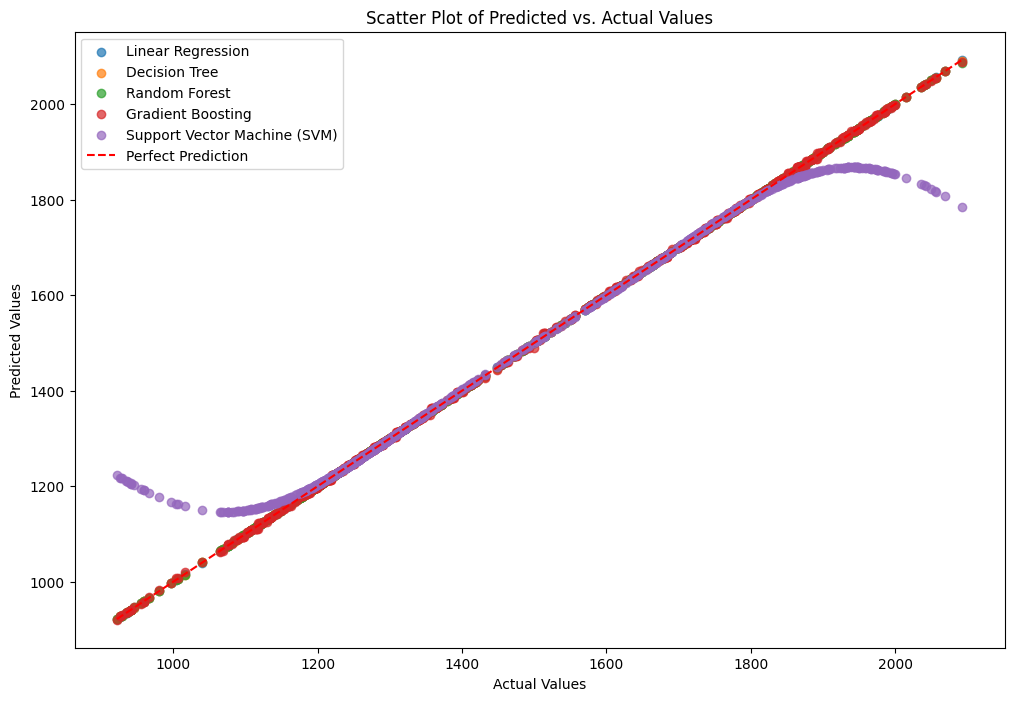

In [ ]:
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=model_name, alpha=0.7)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

##**Saving to the pickle files:**

In [ ]:
import pickle

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linear_model, file)

In [59]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [60]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [61]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)


In [62]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# **Sample Predictions:**

In [63]:

with open('linear_regression_model.pkl', 'rb') as file:
    linear_model = pickle.load(file)

sample_input = pd.DataFrame({'Close': [1600, 1650, 1700, 1750]})

linear_predictions = linear_model.predict(sample_input)

print("Linear Regression Predicted Prices:")
print(linear_predictions)


Linear Regression Predicted Prices:
[1600. 1650. 1700. 1750.]


In [64]:

with open('decision_tree_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)

sample_input = pd.DataFrame({'Close': [1600, 1650, 1700, 1750]})

dt_predictions = dt_model.predict(sample_input)

print("Decision Tree Predicted Prices:")
print(dt_predictions)


Decision Tree Predicted Prices:
[1600.5 1650.  1700.1 1749.8]


In [65]:

with open('svm_model.pkl', 'rb') as file:
    svm_model = pickle.load(file)

sample_input = pd.DataFrame({'Close': [1600, 1650, 1700, 1750]})

svm_predictions = svm_model.predict(sample_input)

print("SVM Predicted Prices:")
print(svm_predictions)


SVM Predicted Prices:
[1598.35985116 1649.11955835 1700.91540849 1752.03912324]
